In [1]:
!pip install gdown
import gdown
import json
import pandas as pd
from IPython.display import clear_output
import numpy as np


url = 'https://drive.google.com/uc?id=1MtCmY5zeLhdKOw8aGCgE_e5yVaODkZYW'
output = 'quotes-2019-nytimes.json.bz2'
gdown.download(url, output, quiet=False)

!bzip2 -dk quotes-2019-nytimes.json.bz2


f = open('quotes-2019-nytimes.json')

tweets = []
for line in f:
  tweets.append(json.loads(line))

df = pd.DataFrame(data=tweets)
clear_output(wait=False)
print(df.keys())

Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')


## Look at the source

In [2]:
sources = df['urls'].apply(lambda x: x[0].split('/')[2].replace('www.', '').replace('.com', '').replace('mobile.', '').replace('.modile', ''))

uniq, counts = np.unique(sources.to_numpy(), return_counts = True)
print(f'The most popular source is {uniq[np.argmax(counts)]}. The proportion is {max(counts)/sum(counts)}')

The most popular source is nytimes. The proportion is 0.8381559989784462


In [3]:
nytimes_subject = df['urls'][sources == 'nytimes'].apply(lambda x: x[0].split('/')[-2])

uniq, counts = np.unique(nytimes_subject.to_numpy(), return_counts = True)
sorted_counts = counts.copy()
sorted_counts.sort()
sorted_counts = sorted_counts[::-1]
print(f'The most popular subject in nytimes is {uniq[np.argmax(counts)]}. The proportion is {max(counts)/sum(counts)}')

The most popular subject in nytimes is politics. The proportion is 0.1269978153386225


In [4]:
for i in range(10):
    print(f'{i + 1}th popular topic is {uniq[counts == sorted_counts[i]]}. The proportion is {sorted_counts[i]/sum(counts)}')

1th popular topic is ['politics']. The proportion is 0.1269978153386225
2th popular topic is ['us']. The proportion is 0.06142347936069909
3th popular topic is ['sports']. The proportion is 0.04964355524893641
4th popular topic is ['nyregion']. The proportion is 0.04653328734046223
5th popular topic is ['europe']. The proportion is 0.0459353800160975
6th popular topic is ['opinion']. The proportion is 0.042543405772105324
7th popular topic is ['television']. The proportion is 0.03546625273082672
8th popular topic is ['style']. The proportion is 0.034764861446475795
9th popular topic is ['review']. The proportion is 0.03355179947108198
10th popular topic is ['business']. The proportion is 0.03298263769115787


In [5]:
result = pd.concat([nytimes_subject, df['quotation'][sources == 'nytimes']], axis=1, join="inner")

In [6]:
result.head(10)

,urls,quotation
0,realestate,"It is not a low-income immigration,"
1,opinion,a champion figure skater switching to roller s...
2,asia,It makes it much more difficult for him to mak...
3,technology,"It puts me in a predicament,"
4,review,A Pile of Leaves.
5,politics,A Senator we can call our own.
7,health,"It was just on a lark,"
10,sports,It's crazy. I can't even really explain it rig...
12,theater,As soon as the gumballs hit or don't hit Luke ...
13,t-magazine,"I've lived long enough, being born in 1961, th..."


In [7]:
result.to_csv('quotation_topics.csv', index=False)

In [8]:
shape = result.urls.value_counts()

In [9]:
k = shape.keys()

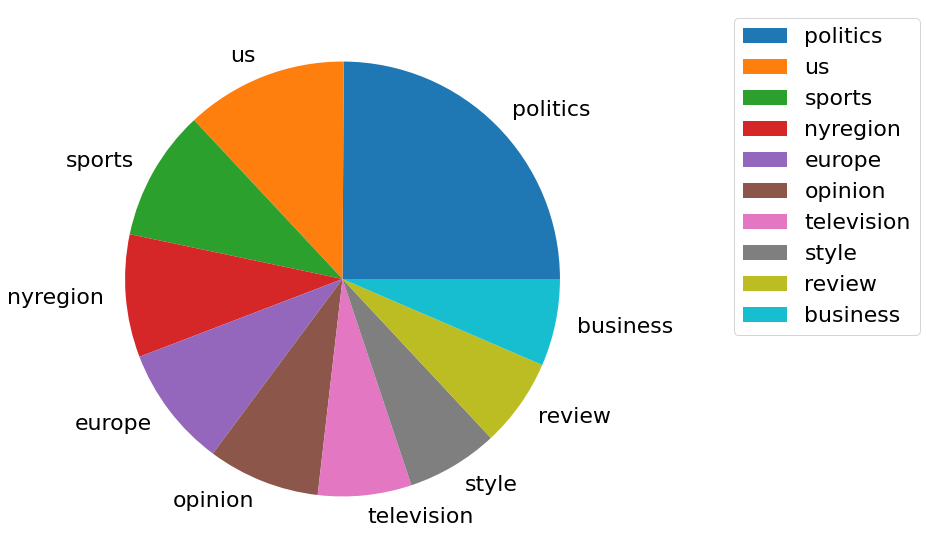

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

y = np.array(shape[:10].values)
mylabels = shape.keys()[:10]

ax.pie(y, labels = mylabels)
ax.legend(bbox_to_anchor=(1.2,1))
plt.show() 